# BHARAT INTERN INTERNSHIP, SEPTEMPBER 2023

# DATA SCIENCE INTERNSHIP

## Problem Statement

Titanic Classification: Make a system that tells whether the person will be saved from sinking. What factors most likely lead to success-socio-economic status, age, gender, and more.

## SOLUTION

## AUTHOR : ARITRA BAG

### DATA DESCRIPTION

The Titanic disaster occurred over 100 years ago on April 15, 1912, claiming the lives of around 1500 passengers and crewmembers. This fateful incident still induces researchers and analysts to understand what could have led to the survival of some passengers and loss of the others. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. The interesting observation that comes out from the sinking is that some people were more likely to survive than others, like women, and children were the ones who got the priority to rescue. Over the years, data on survived as well as deceased passengers has been collected. This dataset is available on a website called Kaggle.com.

The data consists of a passenger sample along with their associated labels. For each passenger, various details such as the name of the passenger, sex, age, passenger class, number of siblings or spouses on board, number of parents or children aboard, cabin, ticket number, fare of the ticket, and embarkation were provided. The dataset is not complete, meaning that for several samples, one or many of the fields were not available and marked empty (especially in the latter fields – age, fare, cabin, and port). However, all sample points contained at least information about gender and passenger class. To normalize the data, we replace missing values with the median of the remaining data set or other values.

With the use of machine learning methods, we aim to determine the correlation between various factors such as age, sex, etc. to the chance of survival of the passengers.

### IMPORTING LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install xgboost

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### IMPORTING DATASET

In [13]:
#Reading dataset from a .CSV file directly
dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/Titanic-Dataset.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### EXPLORATORY ANALYSIS OF THE RAW DATA

In [15]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the PassengerId column is : ' + str(len(dataset['PassengerId'].unique())))
print('\nThe number of unique values in the Survived column is : ' + str(len(dataset['Survived'].unique())))
print('\nThe number of unique values in the Passenger Class column is : ' + str(len(dataset['Pclass'].unique())))
print('\nThe number of unique values in the Name column is : ' + str(len(dataset['Name'].unique())))
print('\nThe number of unique values in the Sex column is : ' + str(len(dataset['Sex'].unique())))
print('\nThe number of unique values in the Age column is : ' + str(len(dataset['Age'].unique())))
print('\nThe number of unique values in the SibSP column is : ' + str(len(dataset['SibSp'].unique())))
print('\nThe number of unique values in the Parch column is : ' + str(len(dataset['Parch'].unique())))
print('\nThe number of unique values in the Ticket column is : ' + str(len(dataset['Ticket'].unique())))
print('\nThe number of unique values in the Fare column is : ' + str(len(dataset['Fare'].unique())))
print('\nThe number of unique values in the Cabin column is : ' + str(len(dataset['Cabin'].unique())))
print('\nThe number of unique values in the Embarked column is : ' + str(len(dataset['Embarked'].unique())))


The number of null values in the dataset is : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The number of duplicate values in the dataset is : 0

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Ca

### DROPPING REDUNDANT FEATURES

Following are the countable and features of the Titanic dataset on which the classification has to
be carried:

1. Survived: The first feature reported if a traveller lived or died.

2. Pclass: This feature renders the passenger division. The tourists could opt from three distinct sections, namely class-1, class-2, class-3. The third class had the highest number of commuters, followed by class-2 and class-1.

3. Sex: Approximately 65% of the tourists were male while the remaining 35% were female.

4. Age: The youngest traveller onboard was aged around two months and the oldest traveller was 80 years. The average age of tourists on board was just under 30 years.

5. SibSp: SibSp is the number of siblings or spouse of a person onboard.

6. Parch: Similar to the SibSp, this feature contained the number of parents or children each passenger was touring with.

7. Fare: There are 4 categories: Low, Med, High Med, & High

The column Embarked is kept but encoded along with gender.

We remove the other columns as it is not important while creating the classifier

In [16]:
dataset = dataset.drop(['PassengerId', 'Name','Ticket','Cabin'],axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### DATA PREPROCESSING

In [17]:
#Dropping all Embarked Null Values
dataset.dropna(axis = 0, subset = ['Embarked'], inplace = True)

#Encoding the Genders
sex = pd.get_dummies(dataset['Sex'], drop_first = True)

#Encoding the Embarked
embarked = pd.get_dummies(dataset['Embarked'], drop_first = True)

#Imputing Missing Age Values
dataset['Age'] = dataset.Age.fillna(dataset.Age.median())

#Imputing the Zero Fare Values
dataset['Fare'] = dataset.Fare.fillna(dataset.Fare.median())

dataset = pd.concat([dataset,sex,embarked],axis = 1)
dataset.drop(['Sex', 'Embarked'], axis =1, inplace =True)

In [18]:
dataset.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,28.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


### EXPLORATORY ANALYSIS OF THE PROCESSED DATA

In [19]:
print('\nThe number of null values in the dataset is : \n' + str(dataset.isnull().sum()))
print('\nThe number of duplicate values in the dataset is : ' + str(dataset.duplicated().sum()))
print('\nThe datatypes in the dataset include :\n')
print(dataset.info())
print('\nThe data distribution in the columns is given by :\n')
print(dataset.describe())
print('\nThe number of unique values in the Survived column is : ' + str(len(dataset['Survived'].unique())))
print('\nThe number of unique values in the Passenger Class column is : ' + str(len(dataset['Pclass'].unique())))
print('\nThe number of unique values in the Age column is : ' + str(len(dataset['Age'].unique())))
print('\nThe number of unique values in the SibSP column is : ' + str(len(dataset['SibSp'].unique())))
print('\nThe number of unique values in the Parch column is : ' + str(len(dataset['Parch'].unique())))
print('\nThe number of unique values in the Fare column is : ' + str(len(dataset['Fare'].unique())))
print('\nThe number of unique values in the male column is : ' + str(len(dataset['male'].unique())))
print('\nThe number of unique values in the Q column is : ' + str(len(dataset['Q'].unique())))
print('\nThe number of unique values in the S column is : ' + str(len(dataset['S'].unique())))
print('\nThe correlation coefficient between the features is :\n \n' + str(dataset.iloc[:,:].corr()) + '\n\n')


The number of null values in the dataset is : 
Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

The number of duplicate values in the dataset is : 116

The datatypes in the dataset include :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB
None

The data distribution in the columns is given by :

         Survived      Pclass         Age       SibSp       Parc

### GRAPHICAL REPRESENTATION OF THE PROCESSED DATASET

This gives us a visual representation of the dataset

Text(0.5, 1.0, 'Boxplot for S')

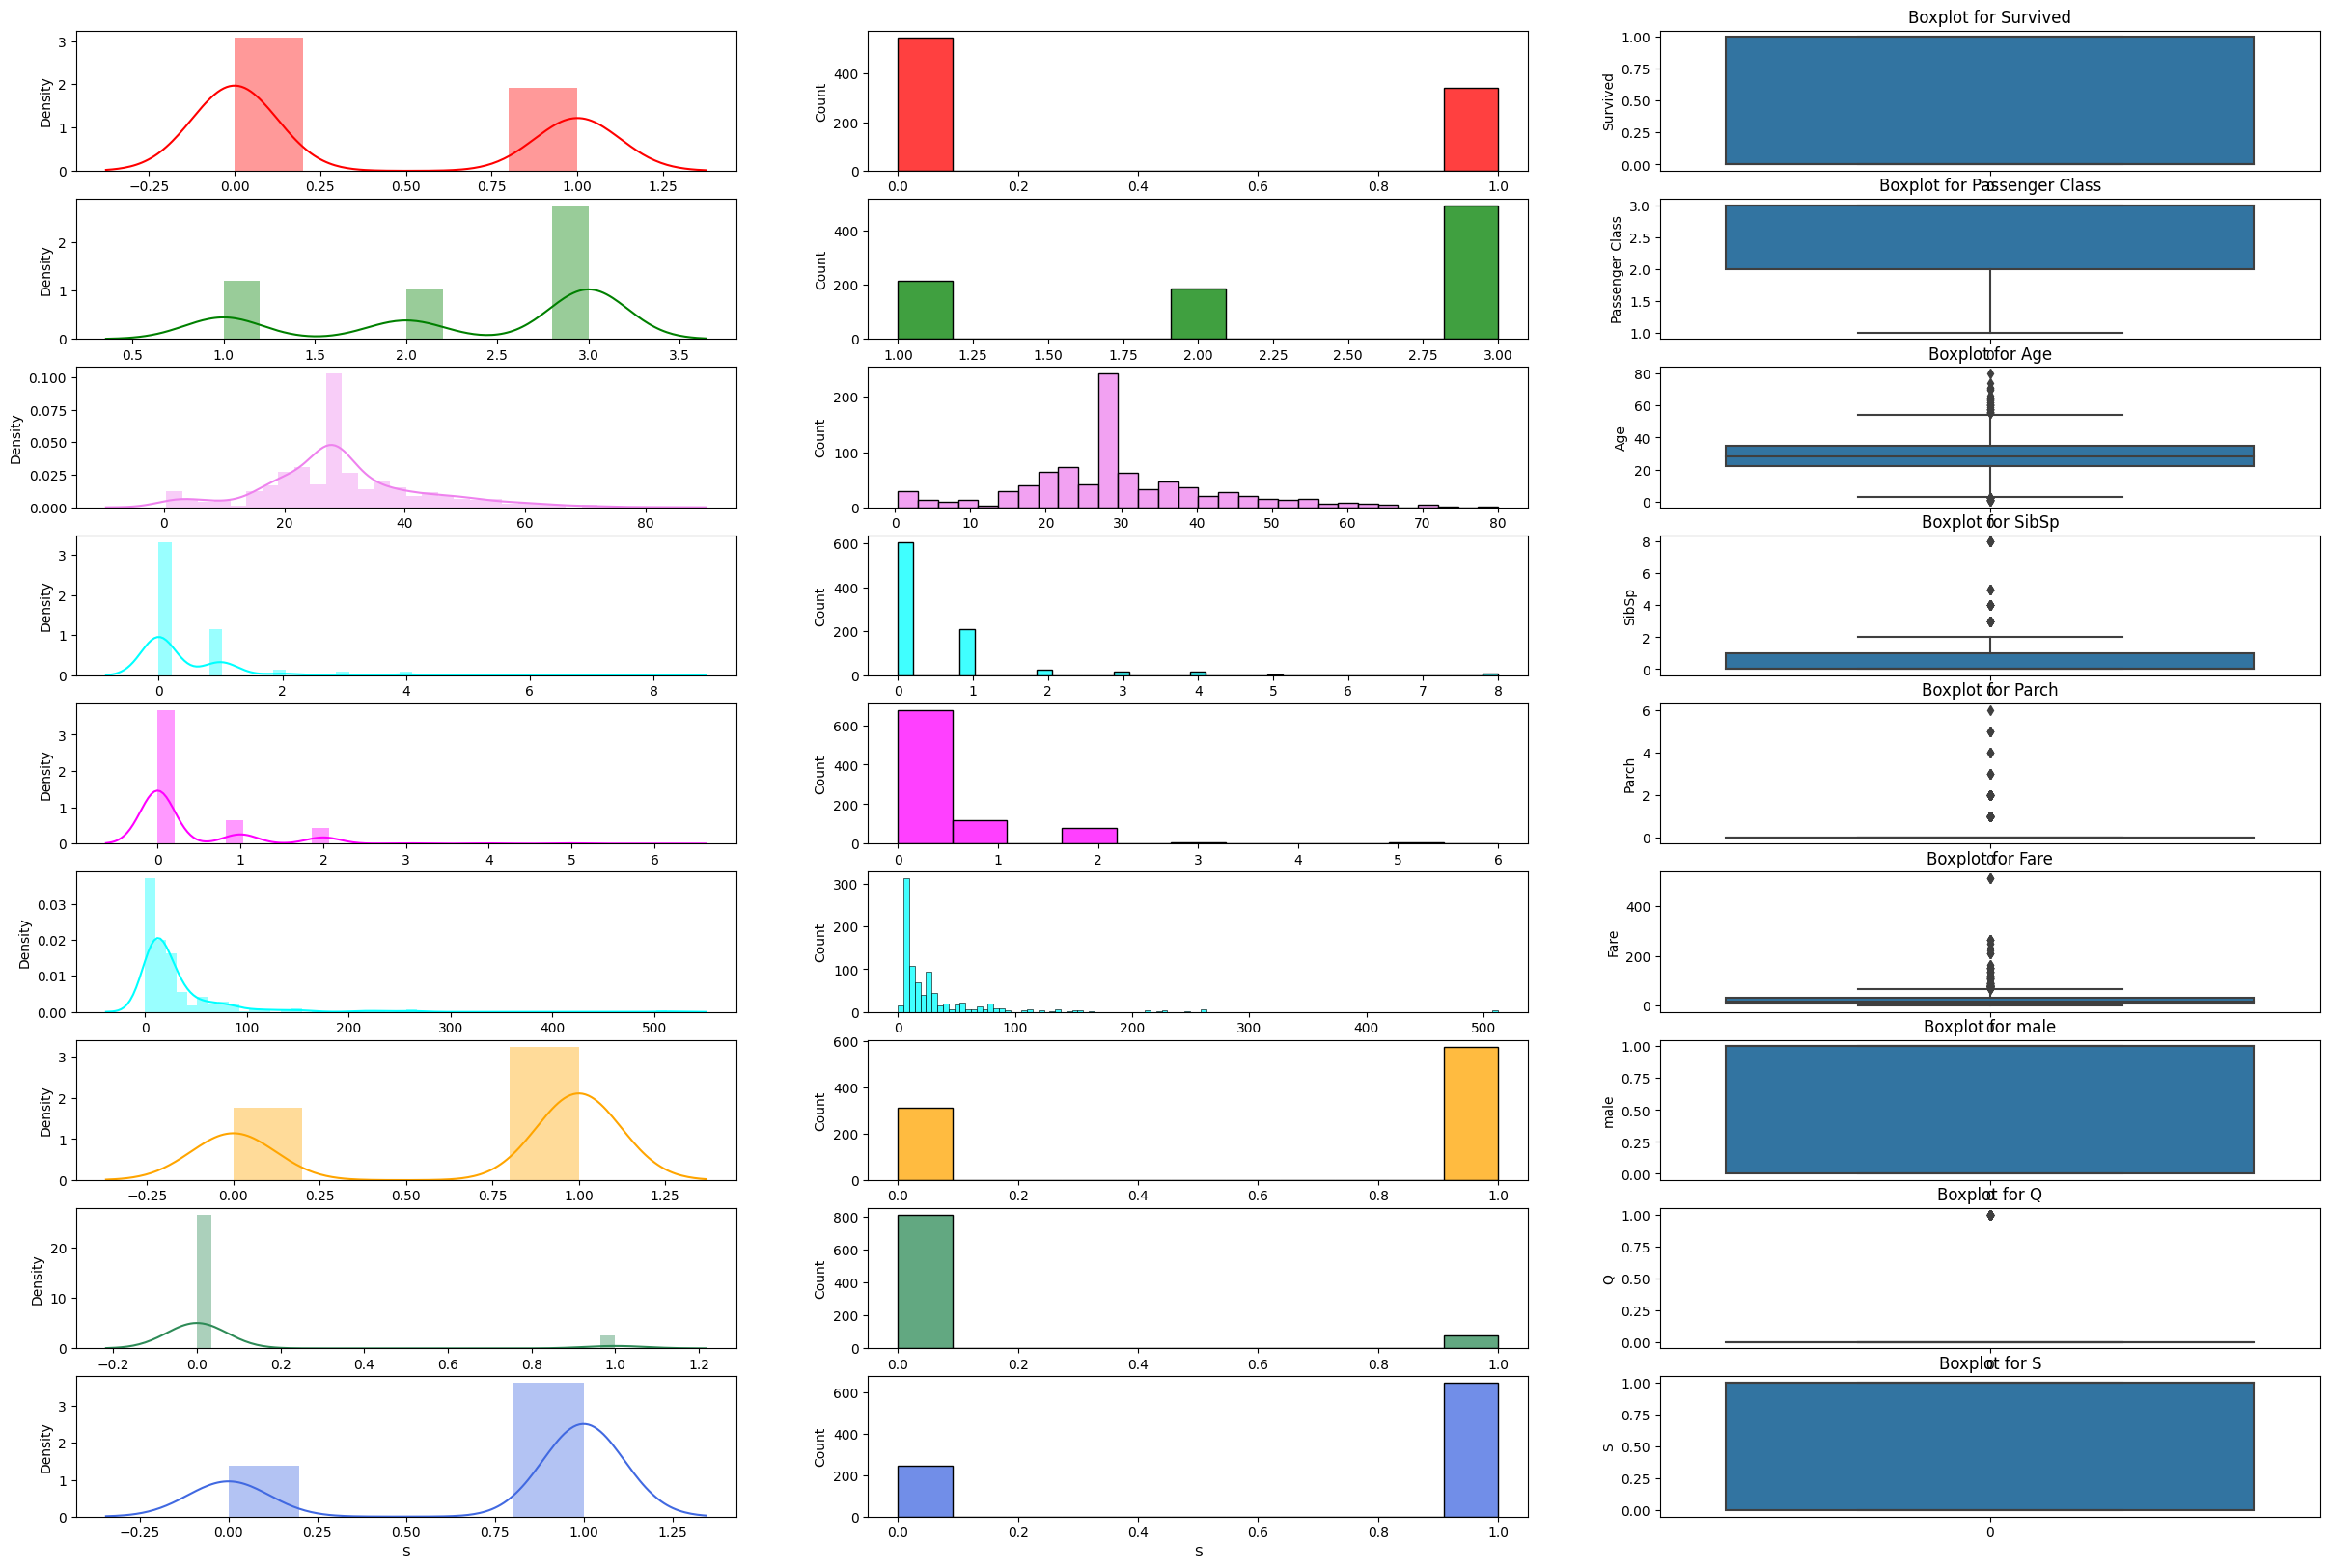

In [10]:
#Data Distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (30,20))
plt.tight_layout(pad = 4.0)

plt.subplot(9,3,1)
sns.distplot(dataset['Survived'],color = 'red')
plt.subplot(9,3,2)
sns.histplot(dataset['Survived'],color = 'red')
plt.subplot(9,3,3)
sns.boxplot(dataset['Survived'])
plt.ylabel('Survived')
plt.title('Boxplot for Survived')

plt.subplot(9,3,4)
sns.distplot(dataset['Pclass'],color = 'green')
plt.subplot(9,3,5)
sns.histplot(dataset['Pclass'],color = 'green')
plt.subplot(9,3,6)
sns.boxplot(dataset['Pclass'])
plt.ylabel('Passenger Class')
plt.title('Boxplot for Passenger Class')

plt.subplot(9,3,7)
sns.distplot(dataset['Age'],color = 'violet')
plt.subplot(9,3,8)
sns.histplot(dataset['Age'],color = 'violet')
plt.subplot(9,3,9)
sns.boxplot(dataset['Age'])
plt.ylabel('Age')
plt.title('Boxplot for Age')

plt.subplot(9,3,10)
sns.distplot(dataset['SibSp'],color = 'cyan')
plt.subplot(9,3,11)
sns.histplot(dataset['SibSp'],color = 'cyan')
plt.subplot(9,3,12)
sns.boxplot(dataset['SibSp'])
plt.ylabel('SibSp')
plt.title('Boxplot for SibSp')

plt.subplot(9,3,13)
sns.distplot(dataset['Parch'],color = 'magenta')
plt.subplot(9,3,14)
sns.histplot(dataset['Parch'],color = 'magenta')
plt.subplot(9,3,15)
sns.boxplot(dataset['Parch'])
plt.ylabel('Parch')
plt.title('Boxplot for Parch')

plt.subplot(9,3,16)
sns.distplot(dataset['Fare'],color = 'cyan')
plt.subplot(9,3,17)
sns.histplot(dataset['Fare'],color = 'cyan')
plt.subplot(9,3,18)
sns.boxplot(dataset['Fare'])
plt.ylabel('Fare')
plt.title('Boxplot for Fare')

plt.subplot(9,3,19)
sns.distplot(dataset['male'],color = 'orange')
plt.subplot(9,3,20)
sns.histplot(dataset['male'],color = 'orange')
plt.subplot(9,3,21)
sns.boxplot(dataset['male'])
plt.ylabel('male')
plt.title('Boxplot for male')

plt.subplot(9,3,22)
sns.distplot(dataset['Q'],color = 'seagreen')
plt.subplot(9,3,23)
sns.histplot(dataset['Q'],color = 'seagreen')
plt.subplot(9,3,24)
sns.boxplot(dataset['Q'])
plt.ylabel('Q')
plt.title('Boxplot for Q')

plt.subplot(9,3,25)
sns.distplot(dataset['S'],color = 'royalblue')
plt.subplot(9,3,26)
sns.histplot(dataset['S'],color = 'royalblue')
plt.subplot(9,3,27)
sns.boxplot(dataset['S'])
plt.ylabel('S')
plt.title('Boxplot for S')

<Axes: >

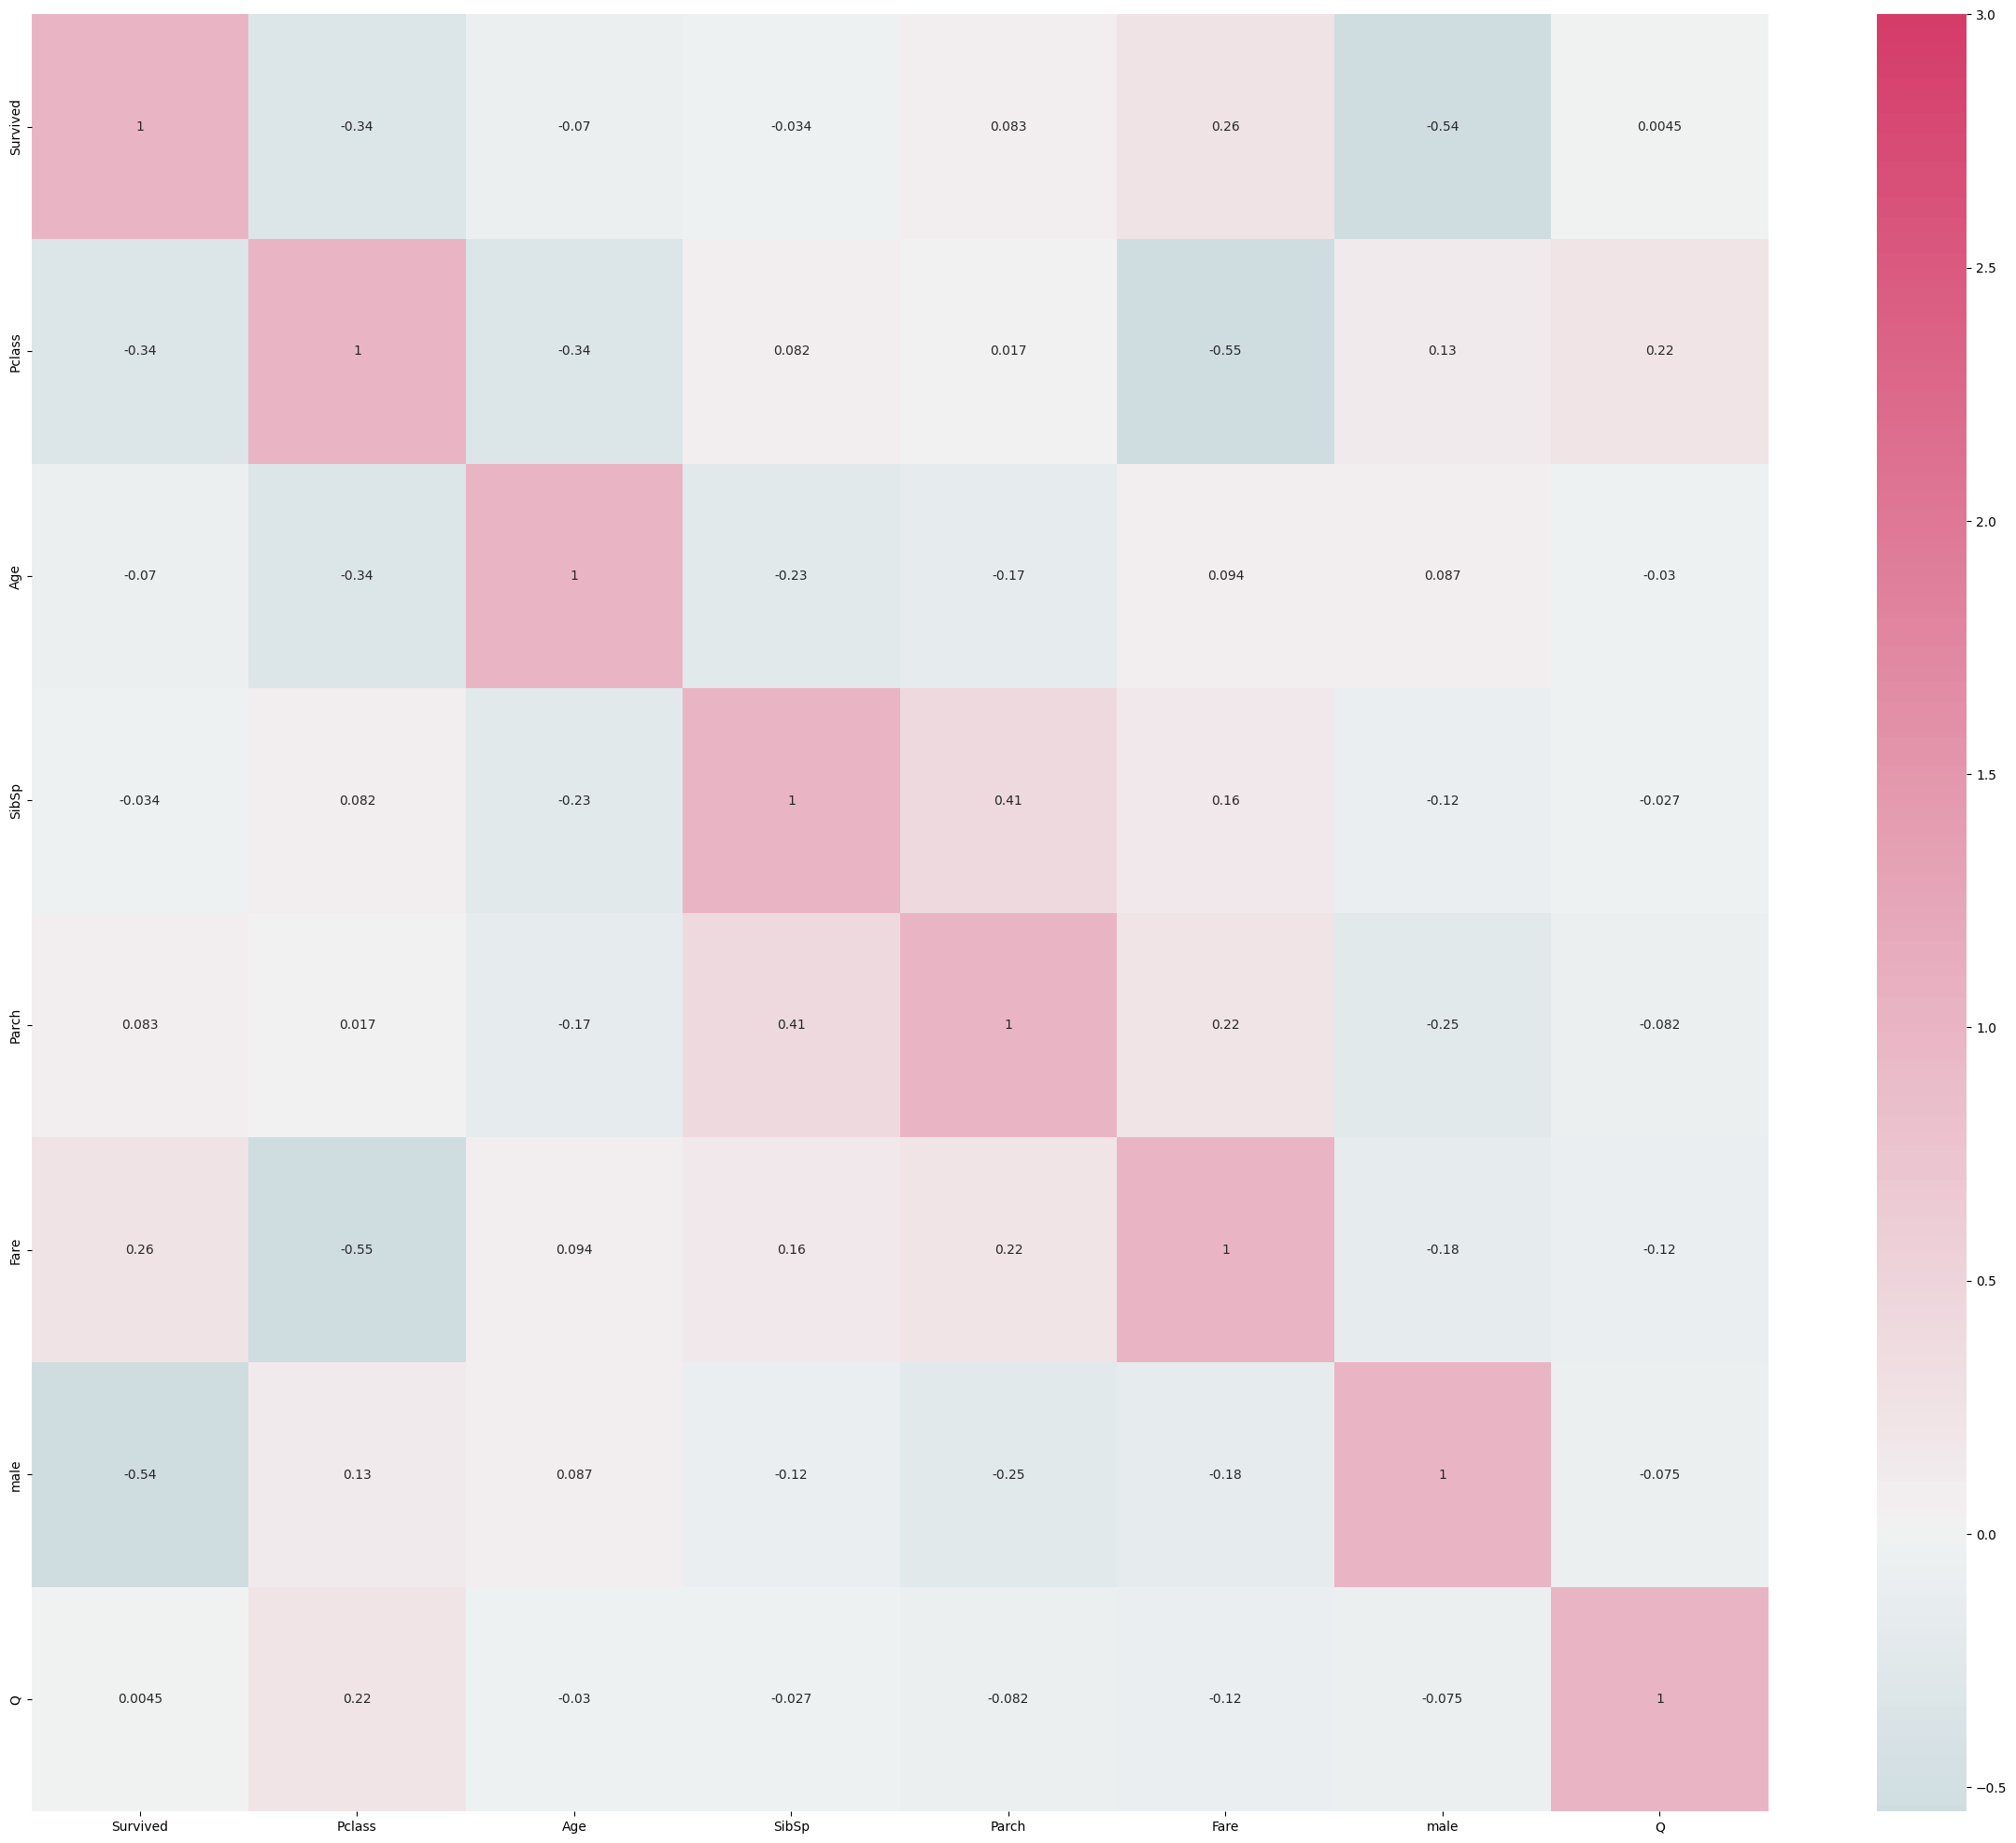

In [ ]:
from numpy.lib.twodim_base import triu_indices_from
plt.figure(figsize = (30,25))
cmap = sns.diverging_palette(220,0, as_cmap = True)
sns.heatmap(dataset.iloc[:,:-1].corr(),cmap = cmap, center = 0, vmax = 3,annot = True)

<Figure size 3000x2500 with 0 Axes>

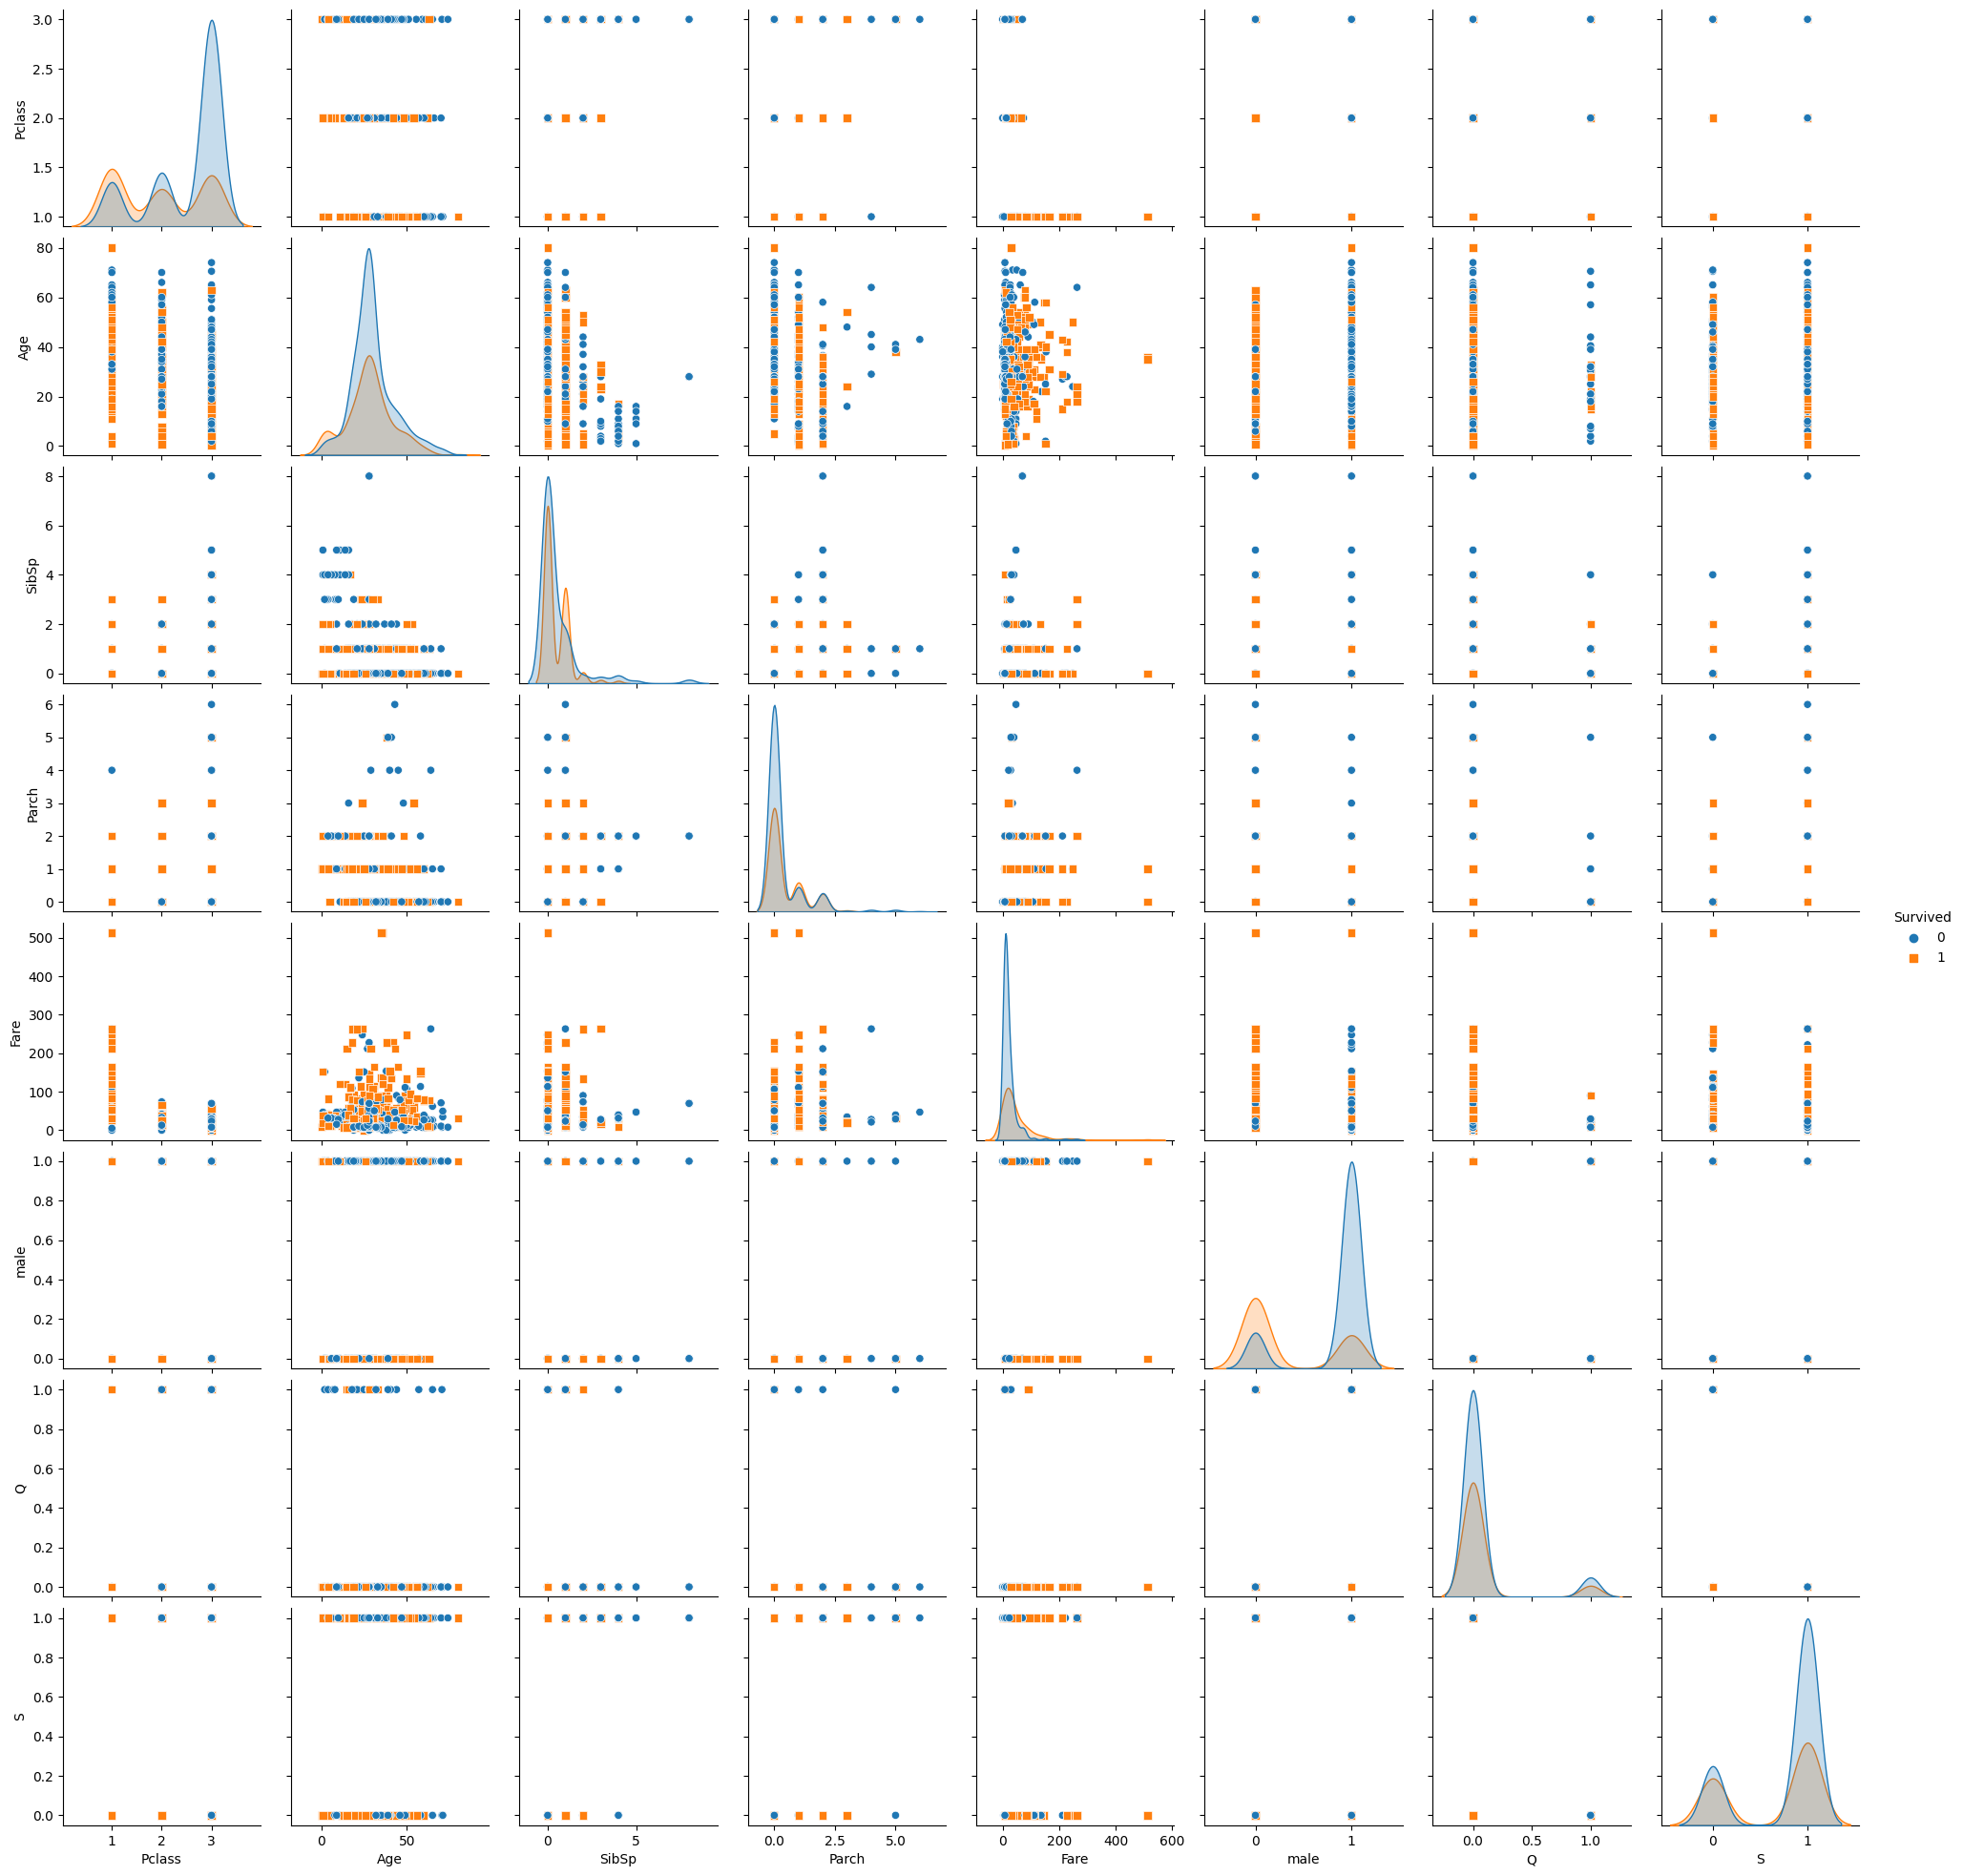

In [ ]:
plt.figure(figsize = (30,25))
plt.tight_layout(pad = 3.0)
sns.pairplot(dataset, hue = 'Survived', markers = ["o", "s"])

### SPLITTING INTO THE X(FEATURES) AND Y(TARGET)

We divide the data into "attributes" (inputs or features or X values) and "labels" (outputs or target or Y values).

In [26]:
features = dataset.iloc[:,1:].values
targets = dataset.iloc[:,0].values

In [27]:
features

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [28]:
targets

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

### SPLITTING THE DATASET INTO THE TRAINING AND TEST SET

Here 20% of the total dataset will be used for testing purposes

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (features, targets, test_size = 0.2, shuffle = True)

### PREDICTION USING VARIOUS SUPERVISED MACHINE LEARNING TECHNIQUES

#### DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV, cross_val_score

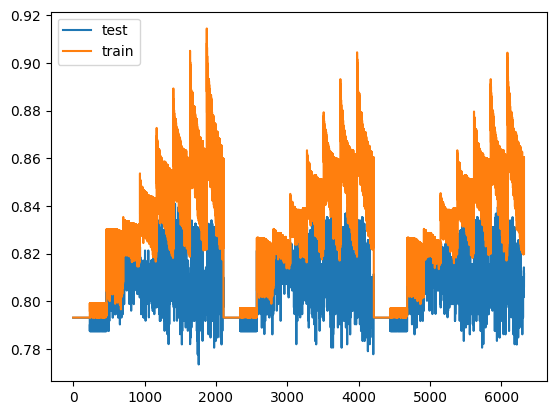

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 14, 'splitter': 'best'}
0.8410211267605634


In [ ]:
# creating a dictionary of all values we want to test
param_grid_tree = {'criterion' : ['gini', 'entropy', 'log_loss'], 'splitter' : ['best', 'random'], 'max_depth' : np.arange(1,10), 'min_samples_split' : np.arange(2,15), 'min_samples_leaf' : np.arange(1,10) }

# model
tree_model = DecisionTreeClassifier()

# using gridsearch to test all values
tree_gscv = GridSearchCV(tree_model, param_grid_tree, cv = 10, return_train_score=True, scoring='f1_micro')

# fitting the model to the data
tree_gscv.fit (x_train, y_train)

# plotting the results
test_scores = tree_gscv.cv_results_['mean_test_score']
train_scores = tree_gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(tree_gscv.best_params_)

# getting the best score
print(tree_gscv.best_score_)

In [ ]:
tree_classifier = DecisionTreeClassifier (criterion = 'gini', max_depth = 7, min_samples_leaf = 1, min_samples_split = 14, splitter = 'best')
tree_classifier.fit (x_train, y_train)
y_predicted_tree = tree_classifier.predict (x_test)
y_predicted_tree_proba = tree_classifier.predict_proba(x_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
y_predicted_tree

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0])

[Text(0.4527439024390244, 0.9375, 'node #0\nmale <= 0.5\ngini = 0.468\nsamples = 100.0%\nvalue = [0.627, 0.373]\nclass = 0'),
 Text(0.2682926829268293, 0.8125, 'node #1\nPclass <= 2.5\ngini = 0.379\nsamples = 33.8%\nvalue = [0.254, 0.746]\nclass = 1'),
 Text(0.14634146341463414, 0.6875, 'node #2\nAge <= 3.0\ngini = 0.116\nsamples = 18.1%\nvalue = [0.062, 0.938]\nclass = 1'),
 Text(0.12195121951219512, 0.5625, 'node #3\ngini = 0.5\nsamples = 0.3%\nvalue = [0.5, 0.5]\nclass = 0'),
 Text(0.17073170731707318, 0.5625, 'node #4\nFare <= 28.856\ngini = 0.104\nsamples = 17.9%\nvalue = [0.055, 0.945]\nclass = 1'),
 Text(0.12195121951219512, 0.4375, 'node #5\nFare <= 28.231\ngini = 0.185\nsamples = 8.2%\nvalue = [0.103, 0.897]\nclass = 1'),
 Text(0.0975609756097561, 0.3125, 'node #6\nSibSp <= 0.5\ngini = 0.16\nsamples = 8.0%\nvalue = [0.088, 0.912]\nclass = 1'),
 Text(0.04878048780487805, 0.1875, 'node #7\nFare <= 13.25\ngini = 0.1\nsamples = 5.3%\nvalue = [0.053, 0.947]\nclass = 1'),
 Text(0.02

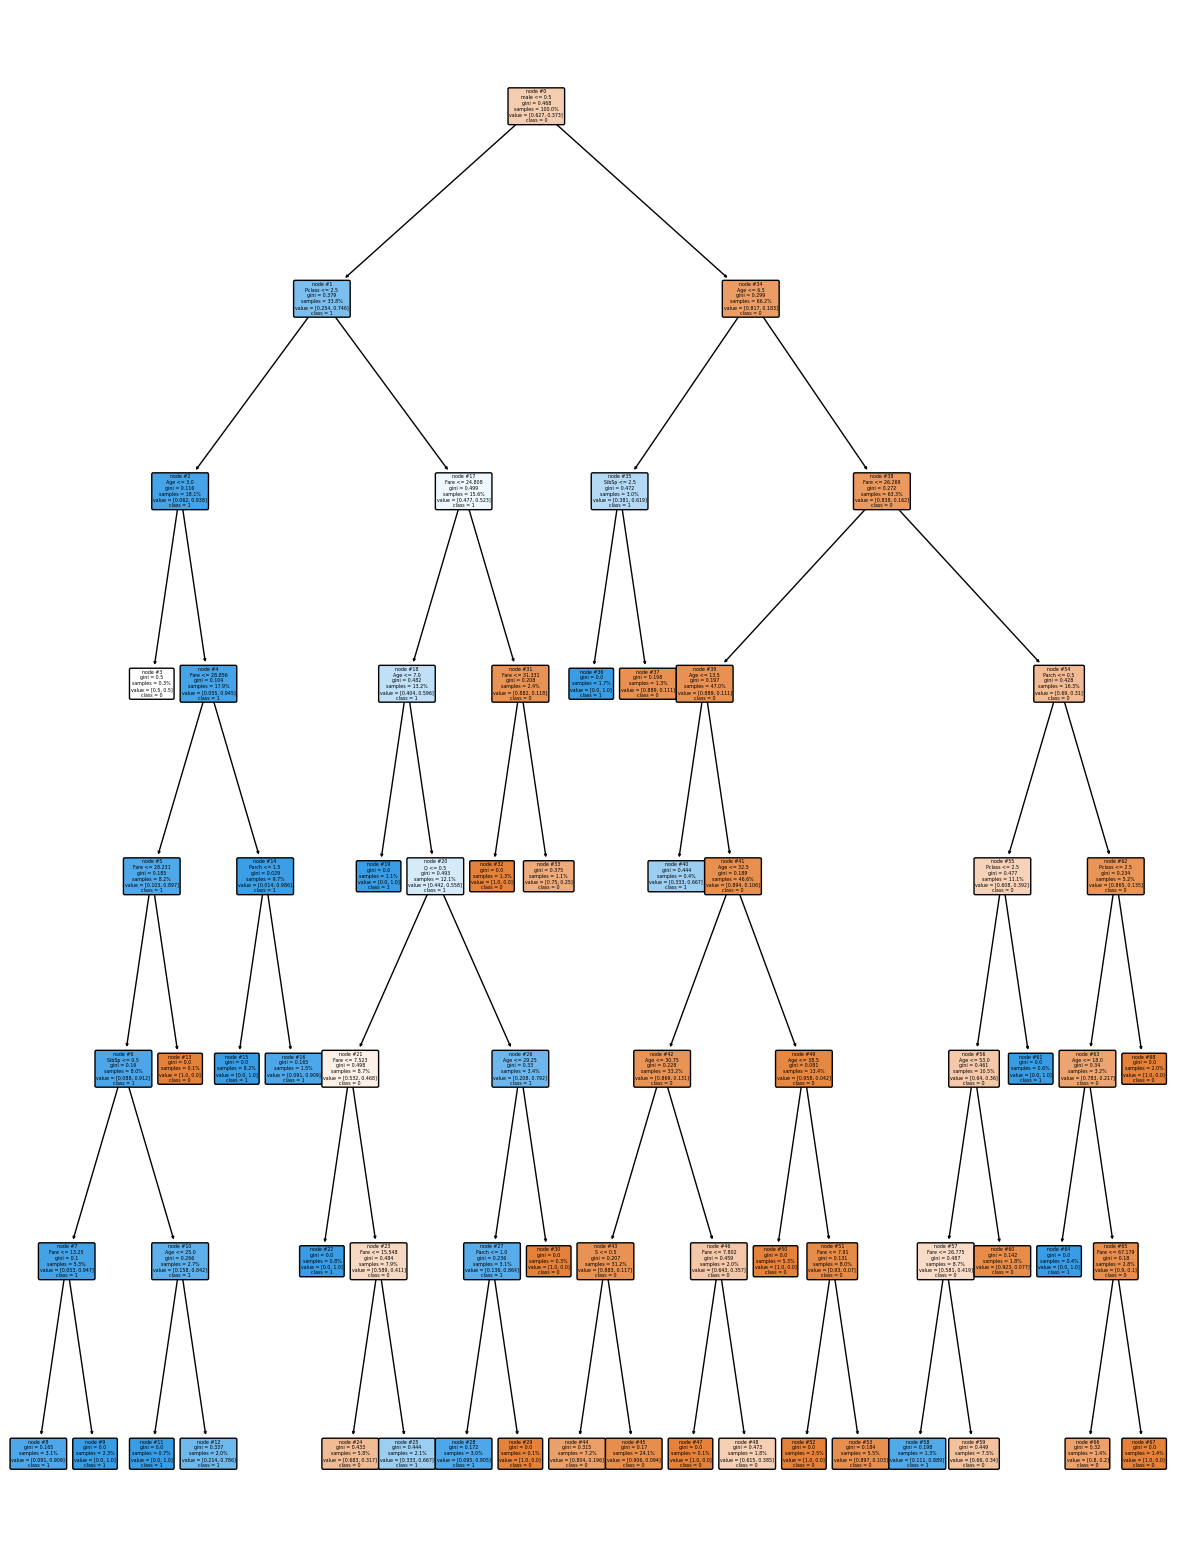

In [ ]:
plt.figure(figsize = (15,20))
sklearn.tree.plot_tree(tree_classifier, feature_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], class_names = ['0', '1'], label='all', filled=True, impurity=True, node_ids=True, proportion=True, rounded=True, precision=3)

In [44]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

In [ ]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_tree))
print('Confusion Matrix :')
tree_cm=confusion_matrix(y_test,y_predicted_tree)
print(tree_cm)
print('\n')
print('The test accuracy percentage is :')
tree_accuracy =(accuracy_score(y_test,y_predicted_tree))*100
print(tree_accuracy)
print('\n')
print('The test precision percentage is :')
tree_precision =(precision_score(y_test,y_predicted_tree))*100
print(tree_precision)
print('\n')
print('The test recall percentage is :')
tree_recall =(recall_score(y_test,y_predicted_tree))*100
print(tree_recall)
print('\n')
print('The test f1 percentage is :')
tree_f1 =(f1_score(y_test,y_predicted_tree))*100
print(tree_f1)
print('\n')
print('The test ROC AUC score is :')
tree_roc = (roc_auc_score(y_test,y_predicted_tree))
print(tree_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       103
           1       0.79      0.71      0.75        75

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix :
[[89 14]
 [22 53]]


The test accuracy percentage is :
79.7752808988764


The test precision percentage is :
79.1044776119403


The test recall percentage is :
70.66666666666667


The test f1 percentage is :
74.64788732394366


The test ROC AUC score is :
0.7853721682847897


In [ ]:
import pickle
pickle.dump(tree_classifier, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_tree_classifier','wb'))

#### RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

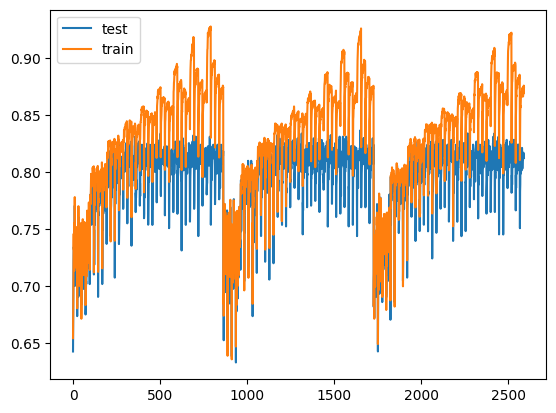

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 20}
0.8368348982785602


In [ ]:
# creating a dictionary of all values we want to test
param_grid_forest = {'n_estimators': np.arange(1,25,1), 'criterion' : ['gini', 'entropy', 'log_loss'],  'max_depth' : np.arange(1,10), 'min_samples_leaf' : np.arange(1,5) }

# model
forest_model = RandomForestClassifier()

# using gridsearch to test all values
forest_gscv = GridSearchCV(forest_model, param_grid_forest, cv = 10, return_train_score=True, scoring='f1_micro')

# fitting the model to the data
forest_gscv.fit (x_train, y_train)

# Plotting the results
test_scores = forest_gscv.cv_results_['mean_test_score']
train_scores = forest_gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(forest_gscv.best_params_)

# getting the best score
print(forest_gscv.best_score_)

In [ ]:
forest_classifier = RandomForestClassifier (n_estimators = 20, criterion = 'entropy', max_depth = 9 , min_samples_leaf = 1)
forest_classifier.fit (x_train, y_train)
y_predicted_forest = forest_classifier.predict (x_test)
y_predicted_forest_proba = forest_classifier.predict_proba(x_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
y_predicted_forest

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0])

In [ ]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_forest))
print('Confusion Matrix :')
forest_cm=confusion_matrix(y_test,y_predicted_forest)
print(forest_cm)
print('\n')
print('The test accuracy percentage is :')
forest_accuracy =(accuracy_score(y_test,y_predicted_forest))*100
print(forest_accuracy)
print('\n')
print('The test precision percentage is :')
forest_precision =(precision_score(y_test,y_predicted_forest))*100
print(forest_precision)
print('\n')
print('The test recall percentage is :')
forest_recall =(recall_score(y_test,y_predicted_forest))*100
print(forest_recall)
print('\n')
print('The test f1 percentage is :')
forest_f1 =(f1_score(y_test,y_predicted_forest))*100
print(forest_f1)
print('\n')
print('The test ROC AUC score is :')
forest_roc = (roc_auc_score(y_test,y_predicted_forest))
print(forest_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       103
           1       0.79      0.72      0.76        75

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.80       178
weighted avg       0.80      0.80      0.80       178

Confusion Matrix :
[[89 14]
 [21 54]]


The test accuracy percentage is :
80.33707865168539


The test precision percentage is :
79.41176470588235


The test recall percentage is :
72.0


The test f1 percentage is :
75.5244755244755


The test ROC AUC score is :
0.7920388349514563


In [ ]:
pickle.dump(forest_classifier, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_forest_classifier','wb'))

#### ADABOOST CLASSIFIER

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

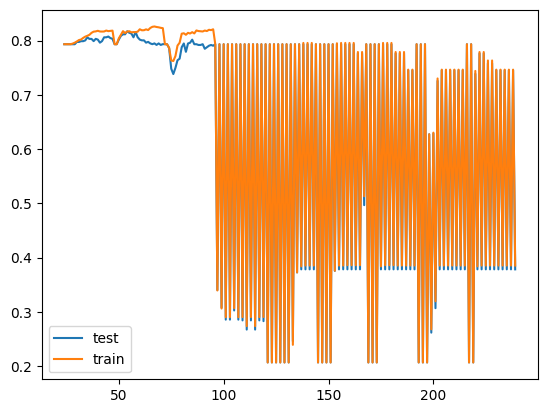

{'learning_rate': 1.0, 'n_estimators': 7}
0.8171165884194054


In [ ]:
# creating a dictionary of all values we want to test
param_grid_ada = {'n_estimators': np.arange(1,25,1), 'learning_rate' : np.arange(0,5,0.5) }

# model
ada_model = AdaBoostClassifier()

# using gridsearch to test all values
ada_gscv = GridSearchCV(ada_model, param_grid_ada, cv = 10, return_train_score=True, scoring='f1_micro')

# fitting the model to the data
ada_gscv.fit (x_train, y_train)

# Plotting the results
test_scores = ada_gscv.cv_results_['mean_test_score']
train_scores = ada_gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(ada_gscv.best_params_)

# getting the best score
print(ada_gscv.best_score_)

In [ ]:
ada_classifier = AdaBoostClassifier (n_estimators = 7, learning_rate = 1.0)
ada_classifier.fit (x_train, y_train)
y_predicted_ada = ada_classifier.predict (x_test)
y_predicted_ada_proba = ada_classifier.predict_proba(x_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
y_predicted_forest

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0])

In [ ]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_ada))
print('Confusion Matrix :')
ada_cm=confusion_matrix(y_test,y_predicted_ada)
print(ada_cm)
print('\n')
print('The test accuracy percentage is :')
ada_accuracy =(accuracy_score(y_test,y_predicted_ada))*100
print(ada_accuracy)
print('\n')
print('The test precision percentage is :')
ada_precision =(precision_score(y_test,y_predicted_ada))*100
print(ada_precision)
print('\n')
print('The test recall percentage is :')
ada_recall =(recall_score(y_test,y_predicted_ada))*100
print(ada_recall)
print('\n')
print('The test f1 percentage is :')
ada_f1 =(f1_score(y_test,y_predicted_ada))*100
print(ada_f1)
print('\n')
print('The test ROC AUC score is :')
ada_roc = (roc_auc_score(y_test,y_predicted_ada))
print(ada_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.77      0.77      0.77        75

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix :
[[86 17]
 [17 58]]


The test accuracy percentage is :
80.89887640449437


The test precision percentage is :
77.33333333333333


The test recall percentage is :
77.33333333333333


The test f1 percentage is :
77.33333333333333


The test ROC AUC score is :
0.8041423948220066


In [ ]:
pickle.dump(ada_classifier, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_ada_classifier','wb'))

#### XG BOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier

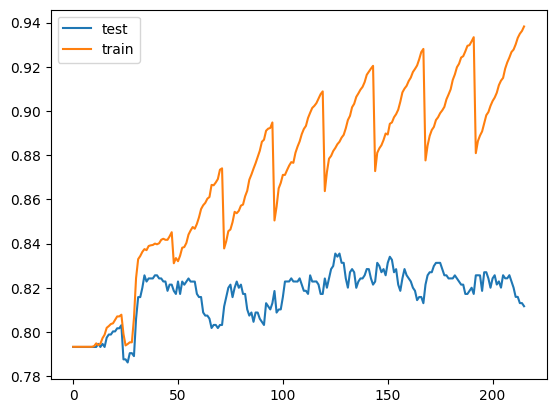

{'max_depth': 6, 'n_estimators': 6}
0.8354655712050079


In [ ]:
#creating a dictionary of all values we want to test
param_grid_xg = {'n_estimators': np.arange(1,25,1), 'max_depth' : np.arange(1,10) }

# model
xg_model = XGBClassifier()

# using gridsearch to test all values
xg_gscv = GridSearchCV(xg_model, param_grid_xg, cv = 10, return_train_score=True, scoring='f1_micro')

# fitting the model to the data
xg_gscv.fit (x_train, y_train)

# Plotting the results
test_scores = xg_gscv.cv_results_['mean_test_score']
train_scores = xg_gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(xg_gscv.best_params_)

# getting the best score
print(xg_gscv.best_score_)

In [ ]:
xg_classifier = XGBClassifier (n_estimators = 6, max_depth = 6)
xg_classifier.fit (x_train, y_train)
y_predicted_xg = xg_classifier.predict (x_test)
y_predicted_xg_proba = xg_classifier.predict_proba(x_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
y_predicted_xg

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0])

In [ ]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_xg))
print('Confusion Matrix :')
xg_cm=confusion_matrix(y_test,y_predicted_xg)
print(xg_cm)
print('\n')
print('The test accuracy percentage is :')
xg_accuracy =(accuracy_score(y_test,y_predicted_xg))*100
print(xg_accuracy)
print('\n')
print('The test precision percentage is :')
xg_precision =(precision_score(y_test,y_predicted_xg))*100
print(xg_precision)
print('\n')
print('The test recall percentage is :')
xg_recall =(recall_score(y_test,y_predicted_xg))*100
print(xg_recall)
print('\n')
print('The test f1 percentage is :')
xg_f1 =(f1_score(y_test,y_predicted_xg))*100
print(xg_f1)
print('\n')
print('The test ROC AUC score is :')
xg_roc = (roc_auc_score(y_test,y_predicted_xg))
print(xg_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       103
           1       0.82      0.72      0.77        75

    accuracy                           0.81       178
   macro avg       0.82      0.80      0.81       178
weighted avg       0.81      0.81      0.81       178

Confusion Matrix :
[[91 12]
 [21 54]]


The test accuracy percentage is :
81.46067415730337


The test precision percentage is :
81.81818181818183


The test recall percentage is :
72.0


The test f1 percentage is :
76.59574468085107


The test ROC AUC score is :
0.801747572815534


In [ ]:
pickle.dump(xg_classifier, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_xg_classifier','wb'))

#### KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

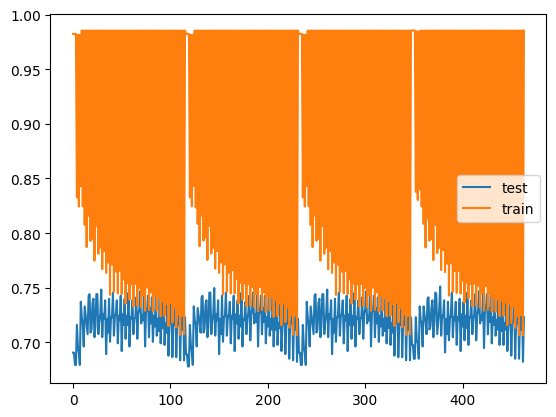

{'algorithm': 'brute', 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.7511541471048513


In [ ]:
#creating a dictionary of all values we want to test
param_grid_knn = { 'n_neighbors': np.arange(1,30,1), 'weights' : ['uniform', 'distance'],  'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p' : [1,2] }

# model
knn_model = KNeighborsClassifier()

# using gridsearch to test all values
knn_gscv = GridSearchCV(knn_model, param_grid_knn, cv = 10, return_train_score=True, scoring='f1_micro')

#fitting the model to the data
knn_gscv.fit (x_train, y_train)

# Plotting the results
test_scores = knn_gscv.cv_results_['mean_test_score']
train_scores = knn_gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(knn_gscv.best_params_)

# getting the best score
print(knn_gscv.best_score_)

In [ ]:
knn_classifier = KNeighborsClassifier (n_neighbors = 8, weights = 'distance' , algorithm = 'brute', p =1 )
knn_classifier.fit (x_train, y_train)
y_predicted_knn = knn_classifier.predict (x_test)
y_predicted_knn_proba = knn_classifier.predict_proba(x_test)

In [ ]:
y_test

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0])

In [ ]:
y_predicted_knn

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1])

In [ ]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_knn))
print('Confusion Matrix :')
knn_cm=confusion_matrix(y_test,y_predicted_knn)
print(knn_cm)
print('\n')
print('The test accuracy percentage is :')
knn_accuracy =(accuracy_score(y_test,y_predicted_knn))*100
print(knn_accuracy)
print('\n')
print('The test precision percentage is :')
knn_precision =(precision_score(y_test,y_predicted_knn))*100
print(knn_precision)
print('\n')
print('The test recall percentage is :')
knn_recall =(recall_score(y_test,y_predicted_knn))*100
print(knn_recall)
print('\n')
print('The test f1 percentage is :')
knn_f1 =(f1_score(y_test,y_predicted_knn))*100
print(knn_f1)
print('\n')
print('The test ROC AUC score is :')
knn_roc = (roc_auc_score(y_test,y_predicted_knn))
print(knn_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       103
           1       0.67      0.67      0.67        75

    accuracy                           0.72       178
   macro avg       0.71      0.71      0.71       178
weighted avg       0.72      0.72      0.72       178

Confusion Matrix :
[[78 25]
 [25 50]]


The test accuracy percentage is :
71.91011235955057


The test precision percentage is :
66.66666666666666


The test recall percentage is :
66.66666666666666


The test f1 percentage is :
66.66666666666666


The test ROC AUC score is :
0.7119741100323624


In [ ]:
pickle.dump(knn_classifier, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_knn_classifier','wb'))

#### LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score

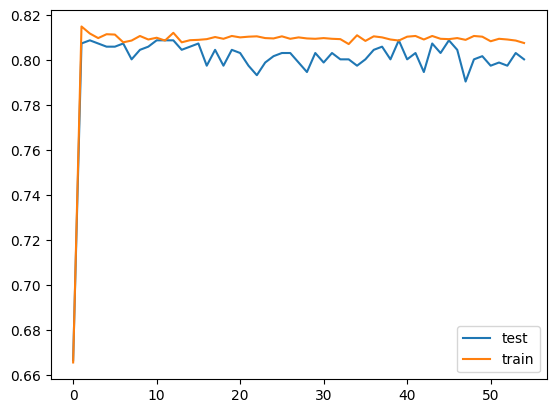

{'C': 0.20001000000000002}
0.808822378716745


In [31]:
#creating a dictionary of all values we want to test
param_grid_regression = { 'C': np.arange(1e-05, 5.5, 0.1)}

# model
regression_model = LogisticRegression()

# using gridsearch to test all values
regression__gscv = GridSearchCV(regression_model, param_grid_regression, cv = 10, return_train_score=True, scoring='f1_micro')

#fitting the model to the data
regression__gscv.fit (x_train, y_train)

# Plotting the results
test_scores = regression__gscv.cv_results_['mean_test_score']
train_scores = regression__gscv.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

# getting the best parameters
print(regression__gscv.best_params_)

# getting the best score
print(regression__gscv.best_score_)

In [34]:
regressor = LogisticRegression(C = 0.808822378716745 )
regressor.fit (x_train, y_train)
y_predicted_regression = regressor.predict (x_test)
y_predicted_knn_regression = regressor.predict_proba(x_test)

In [35]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0])

In [36]:
y_predicted_regression

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0])

In [45]:
print('The classification test results are : \n')
print(classification_report(y_test,y_predicted_regression))
print('Confusion Matrix :')
regression_cm=confusion_matrix(y_test,y_predicted_regression)
print(regression_cm)
print('\n')
print('The test accuracy percentage is :')
regression_accuracy =(accuracy_score(y_test,y_predicted_regression))*100
print(regression_accuracy)
print('\n')
print('The test precision percentage is :')
regression_precision =(precision_score(y_test,y_predicted_regression))*100
print(regression_precision)
print('\n')
print('The test recall percentage is :')
regression_recall =(recall_score(y_test,y_predicted_regression))*100
print(regression_recall)
print('\n')
print('The test f1 percentage is :')
regression_f1 =(f1_score(y_test,y_predicted_regression))*100
print(regression_f1)
print('\n')
print('The test ROC AUC score is :')
regression_roc = (roc_auc_score(y_test,y_predicted_regression))
print(regression_roc)

The classification test results are : 

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       112
           1       0.73      0.58      0.64        66

    accuracy                           0.76       178
   macro avg       0.75      0.73      0.73       178
weighted avg       0.76      0.76      0.76       178

Confusion Matrix :
[[98 14]
 [28 38]]


The test accuracy percentage is :
76.40449438202246


The test precision percentage is :
73.07692307692307


The test recall percentage is :
57.57575757575758


The test f1 percentage is :
64.40677966101696


The test ROC AUC score is :
0.7253787878787878


In [43]:
print ('The intercept is : ' + str(regressor.intercept_))
print('\n')
coefficients = pd.concat([pd.DataFrame(dataset.columns[1:]),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients.columns = ['Feature', 'Coefficient_Value']
coefficients = coefficients.sort_values(['Coefficient_Value'], ascending=[True])
print(coefficients)

The intercept is : [4.84478392]


  Feature  Coefficient_Value
5    male          -2.563911
0  Pclass          -1.191502
2   SibSp          -0.332205
1     Age          -0.039342
3   Parch          -0.032321
4    Fare           0.002048
7       S           0.087274
6       Q           0.703081


In [46]:
import pickle
pickle.dump(regressor, open('/content/drive/MyDrive/Colab Notebooks/Projects for Show/Bharat Intern/Titanic/titanic_logistic_regressor','wb'))

### CONCLUSION

From the Titanic dataset that was provided, extraction of beneficial data was executed by going through the data. The visualization of key attributes through the creation of interesting charts assisted in spotting relationships and hidden insights and thereby aided the cause. With many data values missing, data cleaning had to be executed and missing values were filled with suitable data corresponding to that particular group. Various machine-learning techniques were used to predict survival rates (DecisionTRees, RandomfOREST, Adaboost, XGboost) and to find the similarities of characteristics of the passengers who did and didn't survive (KNN and Logistic Regression).